# Limpieza de datos del censo de EE. UU.

Acabas de ser contratado como analista de datos en la Oficina del Censo, que recopila datos del censo y crea visualizaciones e información interesantes a partir de ellos.

La persona que tenía tu trabajo antes de ti te dejó todos los datos que tenía para el censo más reciente. Está en varios archivos `csv`. No usaban pandas, simplemente revisaban estos archivos `csv` manualmente cada vez que querían encontrar algo. A veces copiaban y pegaban ciertos números en Excel para hacer gráficos.

El pensarlo te hace temblar. Esto no es escalable ni repetible.

Tu jefe quiere que hagas algunos diagramas de dispersión e histogramas al final del día. ¿Puedes poner estos datos en "pandas" y darles una forma razonable para que puedas hacer estos histogramas?

## Inspeciona los datos

1. La primera visualización que su jefe quiere que haga es un diagrama de dispersión que muestre el ingreso promedio en un estado frente a la proporción de mujeres en ese estado.

    Abra algunos de los archivos `csv` del censo que venían con el kit que descargó. ¿Cómo se nombran? ¿Qué tipo de información tienen? ¿Nos ayudarán a hacer este gráfico?

2. Será más fácil inspeccionar estos datos una vez que los tengamos en un DataFrame. ¡Ni siquiera puedes llamar a `.head()` en estos `csv`s! ¿Cómo se supone que debes leerlos?

    Usando `glob`, recorrerás los archivos de censo disponibles y harás en DataFrames. Luego, conccatenarás todos esos DataFrames juntos en un DataFrame, llamado `us_census`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
files = glob.glob('states*.csv')

states_list = []
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)
    
us_census = pd.concat(states_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


3. Mira las `.columns` y los `.dtypes` del marco de datos `us_census`. ¿Esos tipos de datos van a obstaculizarlo la creación de los histogramas?

In [ ]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


4. Mira DataFrame para que puedas entender por qué algunos de estos `dtypes` son objetos en lugar de números enteros o flotantes.

    Comienza a hacer un plan sobre cómo convertir estas columnas en los tipos correctos para la manipulación.

In [ ]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


## Regex

5. Utiliza expresiones regulares para convertir la columna `Ingresos` en un formato que esté listo para la conversión a un tipo numérico.

In [ ]:
for index in range(0, len(us_census['Income'])):
    string = str(us_census['Income'].iat[index])
    replace_dol = string.replace('$','')
    replace_com = replace_dol.replace(',','')
    us_census['Income'].iat[index] = replace_com
    
us_census['Income'] = pd.to_numeric(us_census['Income'])
us_census['Income'].head()

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64

6. Mira la columna `GenderPop`. Necesitas separar esto en dos columnas, la columna "Hombres" y la columna "Mujeres".

    Divide la columna en esas dos nuevas columnas usando `str.split` y separando esos resultados.

In [ ]:
#us_census['GenderPop'].head()

Men = []
Women = []

for index in range(0,len(us_census['GenderPop'])):
    string = str(us_census['GenderPop'].iat[index])
    replace = string.split('_')
    Men.append(replace[0])
    Women.append(replace[1])
    
us_census['Men'] = Men
us_census['Women'] = Women

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135M,19334329F


7. Convierte ambas columnas en tipos de datos numéricos.

    ¡Todavía hay un carácter `M` o `F` en cada entrada! Deberías eliminarlos antes de convertir.

In [ ]:
for index in range(0, len(us_census['Men'])):
    string = str(us_census['Men'].iat[index])
    replace = string.replace('M','')
    us_census['Men'].iat[index] = replace
    
for index in range(0, len(us_census['Women'])):
    string = str(us_census['Women'].iat[index])
    replace = string.replace('F','')
    us_census['Women'].iat[index] = replace
    
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0


8. Ahora debe tienes las columnas que necesitas para hacer el gráfico y asegurarte de que su jefe no se moleste.

    ¡Use matplotlib para hacer un diagrama de dispersión!
   
    ```pía
    plt.scatter(la_columna_mujeres, la_columna_ingresos)
    ```
   
    ¡Recuerda llamar a `plt.show()` para ver el gráfico!

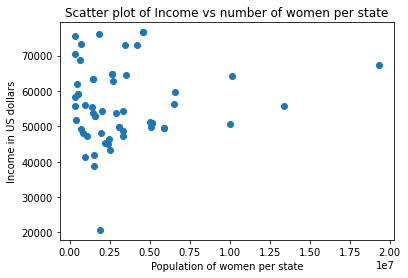

In [ ]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title('Scatter plot of Income vs number of women per state')
plt.xlabel('Population of women per state')
plt.ylabel('Income in US dollars')
plt.show()

9. Quieres volver a revisar tu trabajo. ¡Sabes por experiencia que estos monstruosos archivos csv probablemente tengan valores `nan` en ellos! Imprime tu columna con el número de mujeres por estado.

    Puedes completar esos `nan`s usando la función `.fillna()` de pandas.
   
    Tienes el `TotalPop` por estado, y tienes el `Men` por estado. Como una estimación de los valores `nan` en la columna `Mujeres`, podría usar el `TotalPop` de ese estado menos el `Hombre` para ese estado.
   
    ¡Imprima la columna `Mujeres` después de completar los valores `nan` para ver si funcionó!

In [ ]:
us_census['Women'] = us_census['Women'].fillna( us_census['TotalPop'] - us_census['Men'] )
print(us_census['Women'])

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64


10. ¡Olvidamos buscar duplicados! Use `.duplicated()` en su marco de datos `census` para ver si tenemos filas duplicadas allí.

In [ ]:
us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

11. Elimina esos duplicados usando la función `.drop_duplicates()`.

In [ ]:
census = us_census.drop_duplicates(subset = us_census.columns[1:])
census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0


12. Haz el diagrama de dispersión nuevamente. Ahora, ¡debería ser perfecto! Tú trabajo es seguro, por ahora.

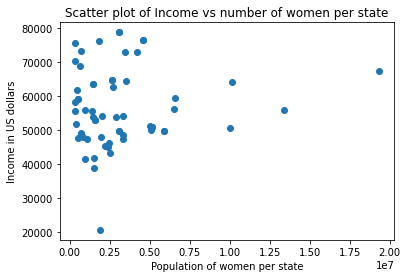

In [ ]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title('Scatter plot of Income vs number of women per state')
plt.xlabel('Population of women per state')
plt.ylabel('Income in US dollars')
plt.show()

## Histograma de Carreras

13. Ahora tu jefe quiere que hagas un montón de histogramas con los datos de raza que tienes. Mira las `.columnas` nuevamente para ver cuáles son las categorías de carrera.

In [ ]:
census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14. ¡Intenta hacer un histograma para cada uno!

     Tendrá que poner las columnas en formato numérico, y esos signos de porcentaje tendrán que desaparecer.
    
     ¡No olvides llenar los valores `nan` con algo que tenga sentido! Probablemente eliminó las filas duplicadas cuando hizo su último gráfico, pero no estaría de más verificar si hay duplicados nuevamente.

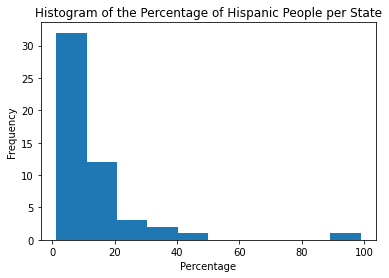

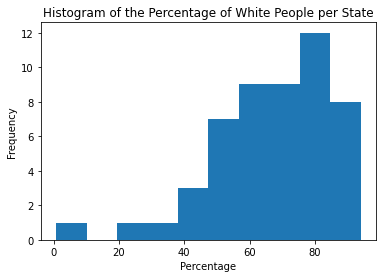

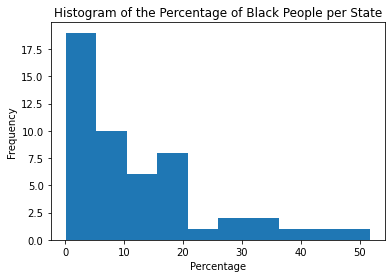

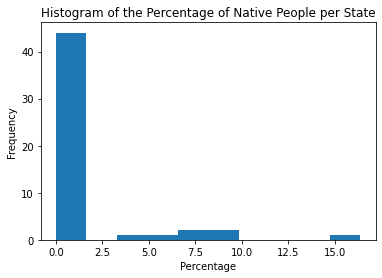

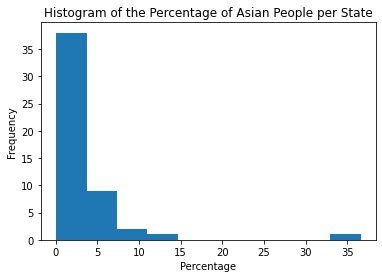

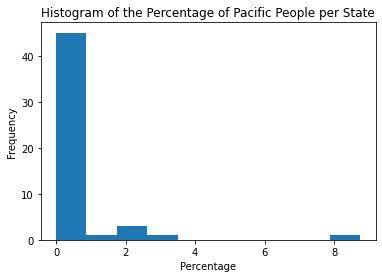

<Figure size 432x288 with 0 Axes>

In [ ]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_census)):    
        string = str(us_census[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

## ¿Qué más puedes hacer?

15. ¡Uf! Definitivamente has impresionado a tu jefe en tu primer día de trabajo.

     Pero, ¿hay alguna manera de transmitir realmente el poder de los pandas y Python sobre la monotonía de `csv` y Excel?
    
     ¡Intenta hacer algunos gráficos más interesantes para mostrar a tu jefe y al mundo! Es posible que necesite limpiar los datos aún más para hacerlo, o la limpieza que ya ha hecho puede brindarle la facilidad de manipulación que ha estado buscando.